# Autoencoder
check out: https://blog.keras.io/building-autoencoders-in-keras.html

In [13]:
import numpy as np
import keras
from keras import layers
import tensorflow as tf

In [9]:
n_samples = 100
n_features = 100
X = np.random.choice([0, 1], size=(n_samples,n_features), p=[1./2, 1./2])
input_shape=X.shape[-1]

In [15]:
#AUTOENCODER MODEL DEFINITION
# This is the size of our encoded representations
encoding_dim = 5 

# This is our input image
input_layer = keras.Input(shape=input_shape,name='input')
# "encoded" is the encoded representation of the input, we can add strong regularization here if n_samples << n_features
encoded = layers.Dense(encoding_dim, activation='relu',name='commpressed_representation')(input_layer)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(input_shape, activation='sigmoid',name='reconstructed_output')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_layer, decoded)

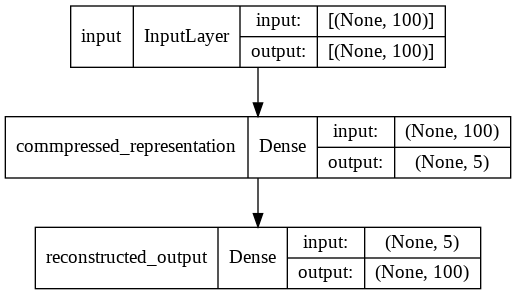

In [16]:
tf.keras.utils.plot_model(autoencoder, "multi_input_and_output_model.png", show_shapes=True)


In [17]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [19]:
hisotry = autoencoder.fit(X,X,
                epochs=50,
                batch_size=5,
                shuffle=True,
                validation_split=0.2,verbose=2)

Epoch 1/50

16/16 - 0s - loss: 0.6292 - val_loss: 0.6888 - 86ms/epoch - 5ms/step

Epoch 2/50

16/16 - 0s - loss: 0.6284 - val_loss: 0.6880 - 61ms/epoch - 4ms/step

Epoch 3/50

16/16 - 0s - loss: 0.6275 - val_loss: 0.6883 - 43ms/epoch - 3ms/step

Epoch 4/50

16/16 - 0s - loss: 0.6269 - val_loss: 0.6884 - 46ms/epoch - 3ms/step

Epoch 5/50

16/16 - 0s - loss: 0.6260 - val_loss: 0.6879 - 55ms/epoch - 3ms/step

Epoch 6/50

16/16 - 0s - loss: 0.6254 - val_loss: 0.6877 - 61ms/epoch - 4ms/step

Epoch 7/50

16/16 - 0s - loss: 0.6248 - val_loss: 0.6879 - 45ms/epoch - 3ms/step

Epoch 8/50

16/16 - 0s - loss: 0.6241 - val_loss: 0.6877 - 66ms/epoch - 4ms/step

Epoch 9/50

16/16 - 0s - loss: 0.6235 - val_loss: 0.6872 - 65ms/epoch - 4ms/step

Epoch 10/50

16/16 - 0s - loss: 0.6228 - val_loss: 0.6875 - 45ms/epoch - 3ms/step

Epoch 11/50

16/16 - 0s - loss: 0.6222 - val_loss: 0.6875 - 45ms/epoch - 3ms/step

Epoch 12/50

16/16 - 0s - loss: 0.6217 - val_loss: 0.6874 - 62ms/epoch - 4ms/step

Epoch 13/50



In [ ]:
# encoder part, to compress data with after training
encoder = keras.Model(input_img, encoded)
